In [48]:

import os
import sys

# Build an absolute path from this notebook's parent directory
module_path = os.path.abspath(os.path.join('..', 'web', 'backend'))

# Add to sys.path if not already present
if module_path not in sys.path:
    sys.path.append(module_path)

In [49]:

import numpy as np
import app.courses as courses

import importlib
importlib.reload(courses)

cs_client = courses.CourseClient("../web/backend/assets/courses")

data = cs_client.all_courses()
embeddings = np.load(f"../web/backend/assets/embeds_all.npy", allow_pickle=True)

print(f'Loaded {len(data)} courses')
print(f'Embedding shape: {embeddings.shape}')

Loaded 21106 courses
Embedding shape: (21106, 768)


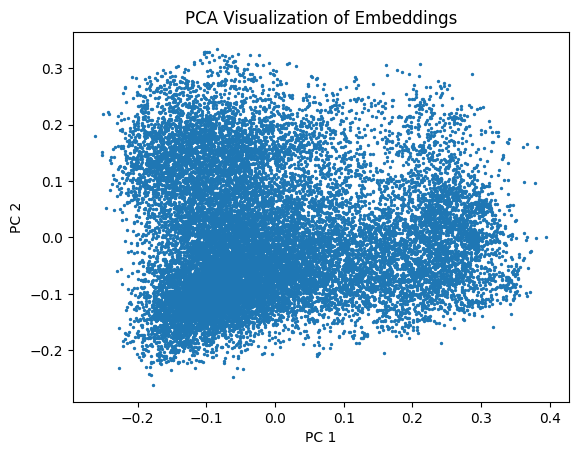

In [50]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

# Reduce to 2D with PCA
pca = PCA(n_components=2)
X_pca = pca.fit_transform(embeddings)

# Plot
plt.scatter(X_pca[:, 0], X_pca[:, 1], s=2)
plt.title("PCA Visualization of Embeddings")
plt.xlabel("PC 1")
plt.ylabel("PC 2")
plt.show()


In [51]:
from sklearn.decomposition import PCA

# Reduce to 50 dimensions with PCA
pca_50 = PCA(n_components=50)
X_pca_50 = pca_50.fit_transform(embeddings)

print(f'Original shape: {embeddings.shape}')
print(f'Reduced shape: {X_pca_50.shape}')

Original shape: (21106, 768)
Reduced shape: (21106, 50)


In [5]:
from sklearn.manifold import TSNE
import pandas as pd

# Reduce to 2D using t-SNE
tsne = TSNE(n_components=3, perplexity=30, verbose=1)
X_tsne_3d = tsne.fit_transform(X_pca_50)

[t-SNE] Computing 91 nearest neighbors...
[t-SNE] Indexed 21106 samples in 0.002s...
[t-SNE] Computed neighbors for 21106 samples in 1.353s...
[t-SNE] Computed conditional probabilities for sample 1000 / 21106
[t-SNE] Computed conditional probabilities for sample 2000 / 21106
[t-SNE] Computed conditional probabilities for sample 3000 / 21106
[t-SNE] Computed conditional probabilities for sample 4000 / 21106
[t-SNE] Computed conditional probabilities for sample 5000 / 21106
[t-SNE] Computed conditional probabilities for sample 6000 / 21106
[t-SNE] Computed conditional probabilities for sample 7000 / 21106
[t-SNE] Computed conditional probabilities for sample 8000 / 21106
[t-SNE] Computed conditional probabilities for sample 9000 / 21106
[t-SNE] Computed conditional probabilities for sample 10000 / 21106
[t-SNE] Computed conditional probabilities for sample 11000 / 21106
[t-SNE] Computed conditional probabilities for sample 12000 / 21106
[t-SNE] Computed conditional probabilities for sam

In [55]:
np.savetxt('reduced_embeddings_vectors.tsv', X_tsne_3d, delimiter='\t')

data_dicts = [{
    'CODE': item.CODE,
    'FACULTY': item.FACULTY,
    'NAME': item.NAME,
    'STUDENT_COUNT': item.STUDENTS_ENROLLED
    } for item in data
]
pd.DataFrame(data_dicts).to_csv('reduced_embeddings_data.tsv', sep='\t', index=False)
pd.DataFrame(X_pca_50).to_csv('reduced_embeddings_vector_50.tsv', sep='\t', index=False, header=False)

print(len(data_dicts))
print(X_pca_50.shape)

21106
(21106, 50)


In [7]:
from sklearn.manifold import TSNE
import pandas as pd

# Reduce to 2D using t-SNE
tsne = TSNE(n_components=2, perplexity=30, verbose=1)
X_tsne = tsne.fit_transform(X_pca_50)

[t-SNE] Computing 91 nearest neighbors...
[t-SNE] Indexed 21106 samples in 0.003s...
[t-SNE] Computed neighbors for 21106 samples in 1.097s...
[t-SNE] Computed conditional probabilities for sample 1000 / 21106
[t-SNE] Computed conditional probabilities for sample 2000 / 21106
[t-SNE] Computed conditional probabilities for sample 3000 / 21106
[t-SNE] Computed conditional probabilities for sample 4000 / 21106
[t-SNE] Computed conditional probabilities for sample 5000 / 21106
[t-SNE] Computed conditional probabilities for sample 6000 / 21106
[t-SNE] Computed conditional probabilities for sample 7000 / 21106
[t-SNE] Computed conditional probabilities for sample 8000 / 21106
[t-SNE] Computed conditional probabilities for sample 9000 / 21106
[t-SNE] Computed conditional probabilities for sample 10000 / 21106
[t-SNE] Computed conditional probabilities for sample 11000 / 21106
[t-SNE] Computed conditional probabilities for sample 12000 / 21106
[t-SNE] Computed conditional probabilities for sam

In [8]:

import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import math

# Extract faculty information
faculties = [item.FACULTY for item in data]
codes = [item.CODE for item in data]
names = [item.NAME for item in data]
student_count = [int(item.STUDENTS_ENROLLED) for item in data]
unique_faculties = list(set(faculties))

# Define custom colors for each faculty
custom_colors = {
    'FI': '#f2d45c',
    'FF': '#4bc8ff',
    'FSS': '#008c78',
    'ESF': '#b9006e',
    'PrF': '#9100dc',
    'LF': '#f01928',
    'PdF': '#ff7300',
    'FaF': '#56788d',
    'FSpS': '#5ac8af',
    'CST': '#0031e7',
    'PřF': '#00af3f'
}

# For any faculties not explicitly defined above, assign colors from a default palette
default_colors = plt.cm.tab20.colors
for i, faculty in enumerate(unique_faculties):
    if faculty not in custom_colors:
        custom_colors[faculty] = default_colors[i % len(default_colors)]

# Map faculties to their colors
colors = [custom_colors[faculty] for faculty in faculties]

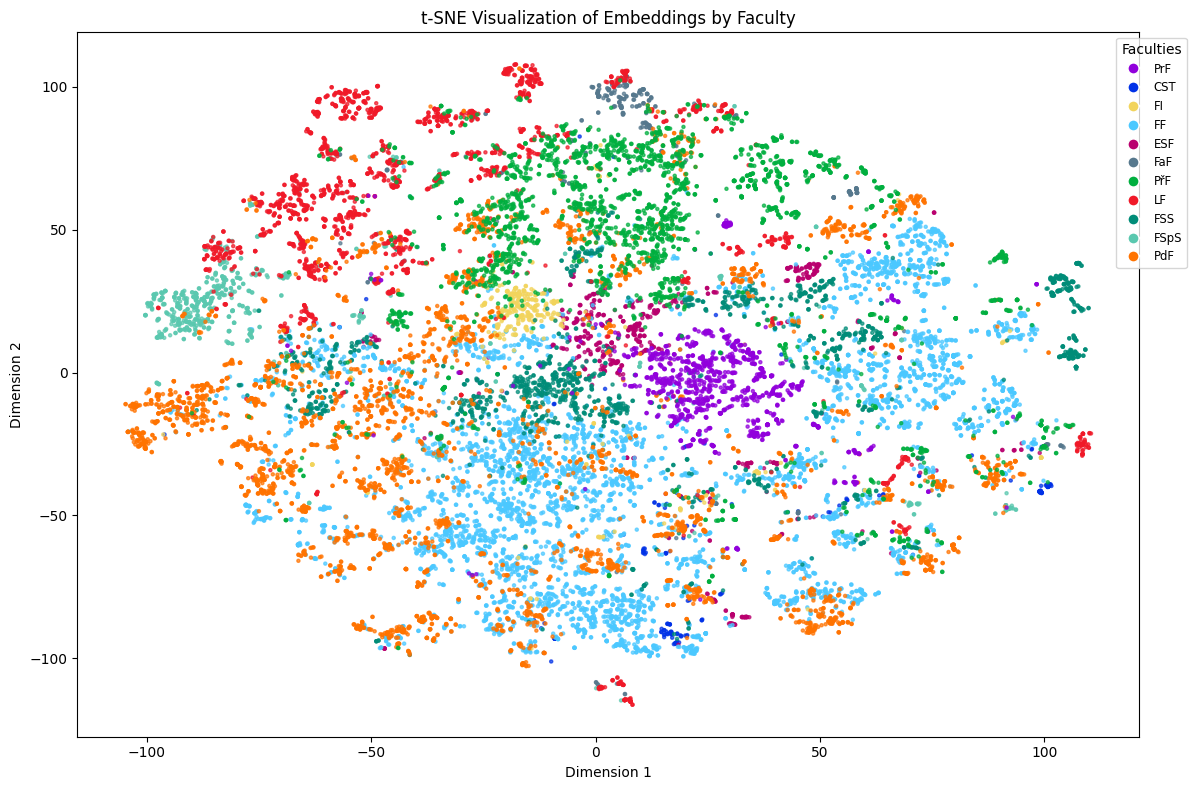

In [9]:

# Plot with custom colors
plt.figure(figsize=(12, 8))
scatter = plt.scatter(X_tsne[:, 0], X_tsne[:, 1], c=colors, s=5, alpha=0.7)

# Add legend
legend_elements = [plt.Line2D([0], [0], marker='o', color='w', 
                             markerfacecolor=custom_colors[faculty], 
                             markersize=8, label=faculty) for faculty in unique_faculties]
plt.legend(handles=legend_elements, title="Faculties", loc='best', bbox_to_anchor=(1.05, 1), fontsize='small')

plt.title("t-SNE Visualization of Embeddings by Faculty")
plt.xlabel("Dimension 1")
plt.ylabel("Dimension 2")
plt.tight_layout()
plt.show()

In [30]:
import plotly.express as px

student_count_log = [math.sqrt(min(int(item.STUDENTS_ENROLLED), 1000)) for item in data]

# Convert your data to a DataFrame (assuming X_tsne and faculties still exist in scope)
df = pd.DataFrame({
    'Dimension 1': X_tsne[:, 0],
    'Dimension 2': X_tsne[:, 1],
    'Faculty': faculties,
    'Codes': codes,
    'Names': names,
    'Student Count': student_count,
    'size': student_count_log,
})

# Convert your custom_colors dict into a form that Plotly can use
# (faculty name -> color code)
color_discrete_map = {
    faculty: color
    for faculty, color in custom_colors.items()
}

# Create an interactive scatter plot
fig = px.scatter(
    df,
    x='Dimension 1',
    y='Dimension 2',
    color='Faculty',
    size='size',
    color_discrete_map=color_discrete_map,
    title="t-SNE Visualization of Embeddings by Faculty and Student Count (Interactive)",
    height=1200,
    hover_data=['Codes', 'Names', "Student Count"]
)

fig.show()

C:\Users\tomas\AppData\Roaming\Python\Python312\site-packages\plotly\express\_core.py:1985: FutureWarning:

When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.



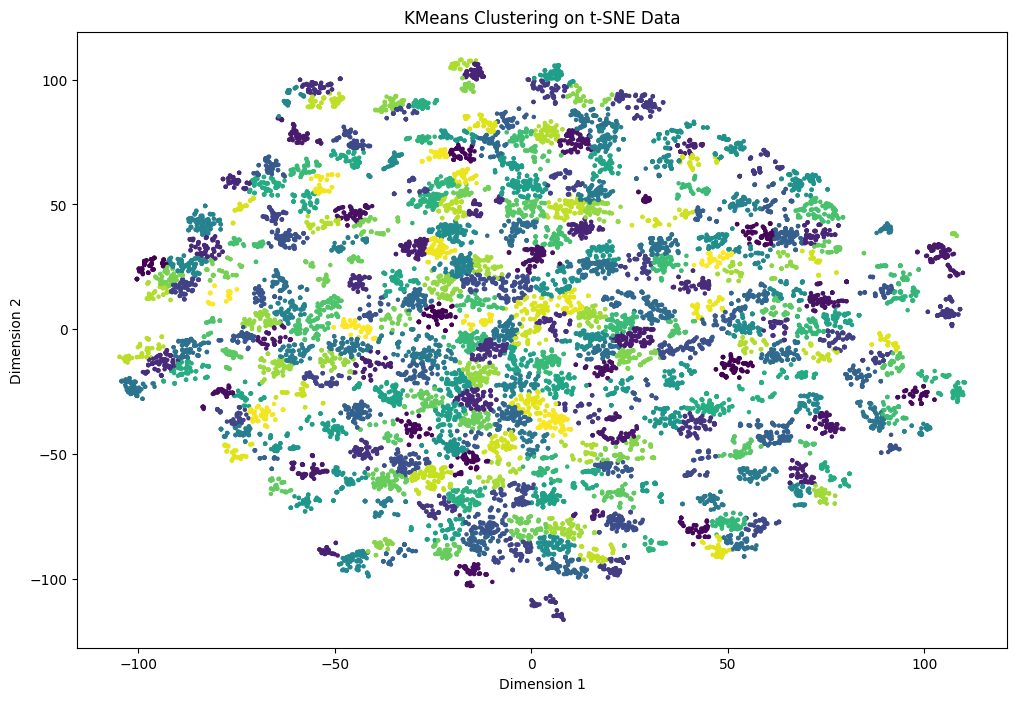

In [58]:
from sklearn.cluster import KMeans

# Perform KMeans clustering on the 2D t-SNE data
kmeans = KMeans(n_clusters=300, random_state=42)
clusters = kmeans.fit_predict(X_tsne)

# Plot the clusters
plt.figure(figsize=(12, 8))
plt.scatter(X_tsne[:, 0], X_tsne[:, 1], c=clusters, s=5)
plt.title("KMeans Clustering on t-SNE Data")
plt.xlabel("Dimension 1")
plt.ylabel("Dimension 2")
plt.show()

In [59]:
#### python
# filepath: c:\Users\tomas\Documents\github.com\tomz197\pv254-project\notebooks\visualize_embeddings.ipynb
import plotly.graph_objects as go
import numpy as np
import collections

# Calculate the centroids and sizes for each cluster
faculties = np.array(faculties)
unique_clusters = np.unique(clusters)
centroids = []
cluster_sizes = []
cluster_majority_colors = []

for c in unique_clusters:
    # Get all points belonging to cluster c
    cluster_points = X_tsne[clusters == c]
    centroids.append(cluster_points.mean(axis=0))
    cluster_sizes.append(len(cluster_points))

    # Determine majority faculty in this cluster
    cluster_faculties = faculties[clusters == c]
    majority_faculty = collections.Counter(cluster_faculties).most_common(1)[0][0]
    # Map that majority faculty to its color
    color_code = custom_colors.get(majority_faculty, "gray")  # fallback color is gray
    cluster_majority_colors.append(color_code)

centroids = np.array(centroids)

# Optionally, connect each centroid to its nearest neighbor
edge_x, edge_y = [], []
for i in range(len(centroids)):
    distances = np.linalg.norm(centroids - centroids[i], axis=1)
    distances[i] = np.inf  # Ignore distance to itself
    j = np.argmin(distances)
    edge_x += [centroids[i, 0], centroids[j, 0], None]
    edge_y += [centroids[i, 1], centroids[j, 1], None]

fig = go.Figure()

# Add lines (connections)
fig.add_trace(go.Scatter(
    x=edge_x,
    y=edge_y,
    mode='lines',
    line=dict(color='gray', width=1),
    hoverinfo='none'
))

# Add scatter for centroids, coloring by majority faculty
fig.add_trace(go.Scatter(
    x=centroids[:, 0],
    y=centroids[:, 1],
    mode='markers',
    text=[f"Cluster {c}, size={cluster_sizes[i]}" for i, c in enumerate(unique_clusters)],
    marker=dict(
        size=[s for s in cluster_sizes],
        sizemode='area',
        sizeref=0.4,
        color=cluster_majority_colors,  # Use the precomputed colors
        showscale=False                 # Disable color scale bar
    )
))

fig.update_layout(
    title="Cluster Visualization (Colored by Majority Faculty)",
    xaxis_title="Dimension 1",
    yaxis_title="Dimension 2",
    height=1000
)

fig.show()